In [1]:
# Assignment 8 
# Anirudh Sathish 
# CS20B1125

### Question 
- Create a concentric square image, with inner square pixel intensity values as 125 and outer square as 0 everywhere.
- Find the projection along the row, column, diagonal with 45 degree and 135 degree. Reconstruct the image by applying back projection algorithm using the
following ways:
- 1. the row projection only
- 2. the row and column projections
- 3. the row and column and diagonal 45-degree projections
- 4. the row and column and diagonal 45- and 135-degree projections

In [21]:
# libs 
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 

In [22]:
# Taking size of image 
size = 100

# creating required image 
# Create an empty image with all zeros
image = np.zeros((size, size))


# Set the intensity values of the inner square
inner_size = 50
inner_start = (size - inner_size) // 2
inner_end = inner_start + inner_size
image[inner_start:inner_end, inner_start:inner_end] = 125

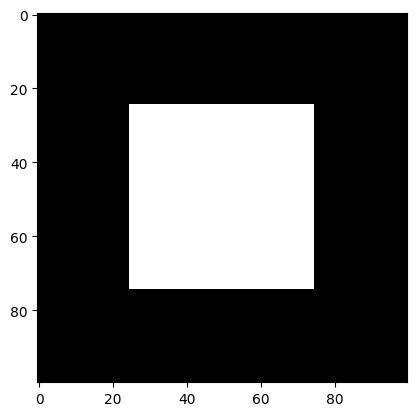

In [23]:
plt.imshow(image,cmap = 'gray')

In [24]:
# Define the projection functions
def row_projection(image):
    return np.sum(image, axis=1)

def column_projection(image):
    return np.sum(image, axis=0)

def diagonal_projection(image, angle):
    if angle == 45:
        return np.sum(np.diagonal(image))
    elif angle == 135:
        return np.sum(np.diagonal(np.fliplr(image)))

In [43]:
def diaPro(img, angle):
    if angle == 135:
        img = cv2.flip(img,1)
    proj = np.zeros((image.shape[0]*2-1,image.shape[1]),dtype = np.uint8)
    for k in range(-img.shape[1]+1, img.shape[0]):
        diag = np.diag(img, k=k)
        proj[k+img.shape[1]-1,:] = np.sum(diag)
    return proj

In [45]:
# Calculate the projections
row_proj = row_projection(image)
col_proj = column_projection(image)
diag45_proj = diaPro(image,45)
diag135_proj = diaPro(image, 135)

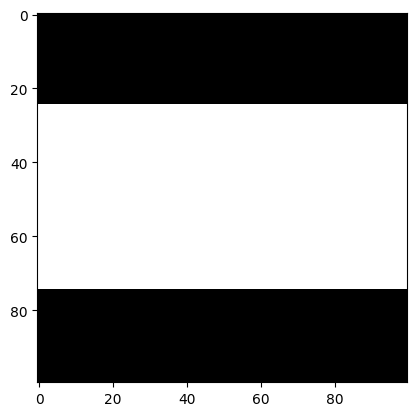

In [46]:
# using row projection 
proj = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)

# Back project the row projection along each row of the projection image
for i in range(proj.shape[0]):
    for j in range(proj.shape[1]):
        proj[i,j] = row_proj[i]

plt.imshow(proj,cmap = 'gray')


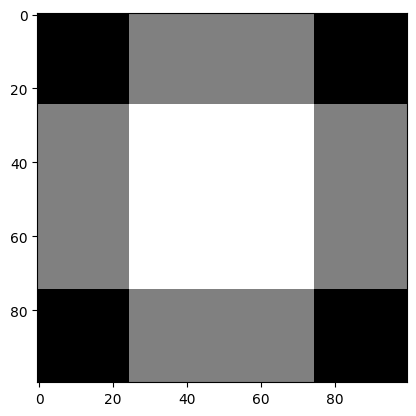

In [47]:
# using row projection + column projection  
proj2 = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)

# Back project the row projection along each row of the projection image
for i in range(proj2.shape[0]):
    for j in range(proj2.shape[1]):
        proj2[i,j] = row_proj[i] + col_proj[j]

plt.imshow(proj2,cmap = 'gray')

In [48]:
diag135_proj.shape

(199, 100)

In [28]:
diag_proj = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)

# Iterate over all the diagonals in the image and sum the pixel values along each diagonal
for k in range(-image.shape[1]+1, image.shape[0]):
    diag = np.diag(image, k=k)
    diag_proj[k+image.shape[1]-1,:] = np.sum(diag)


IndexError: index 100 is out of bounds for axis 0 with size 100

In [14]:
diag_proj.shape

(199, 100)

In [29]:
# using row projection + column + diag projection  
proj3 = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)

# Back project the row projection along each row of the projection image
for i in range(proj3.shape[0]):
    for j in range(proj3.shape[1]):
        proj3[i,j] = row_proj[i] + col_proj[j] +diag45_proj[i][j]

plt.imshow(proj3,cmap = 'gray')

IndexError: invalid index to scalar variable.

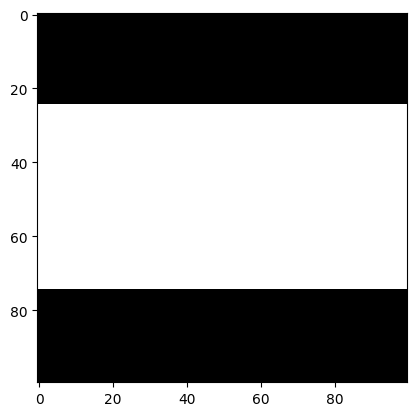

In [ ]:
# Reconstruct the image using different projections
row_recon = back_projection(row_proj, 'row')
row_col_recon = back_projection([row_proj, col_proj], 'row')
row_col_diag45_recon = back_projection([row_proj, col_proj, diag45_proj], 'row')
row_col_diag_recon = back_projection([row_proj, col_proj, diag45_proj, diag135_proj], 'row')
